# Regresión logística Datos Vino

## Preliminares

In [50]:
exec(open(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\1. Ejercicio base datos vino\NuestrasFunciones.py').read())

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Leer datos depurados DatosVinoDep_winsRand
vinosDep = pd.read_csv(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\1. Ejercicio base datos vino\script_base_vinos_reg_log\DatosVinoDep_winsRand.csv', index_col=0)

# Descriptivo de comprobación
vinosDep.head()

,ID,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella,Etiqueta,Clasificacion,Region,prop_missings,Beneficio,Compra
0,2,0.16,-0.81,26.10,-0.425,1.02792,3.38,0.70,15.9,2,1.00,M,***,1.0,6.666667,515,1
1,4,2.64,-0.88,14.80,0.037,0.99518,3.12,0.48,22.0,3,3.38,M,***,3.0,0.000000,585,1
2,8,0.29,-0.40,21.50,0.060,0.99572,3.49,1.21,10.3,3,3.72,R,Desc,1.0,0.000000,0,0
3,11,-1.22,0.34,1.40,0.040,1.03236,3.20,0.34,11.6,2,6.23,B,***,2.0,6.666667,775,1
4,12,0.27,1.05,11.25,-0.007,0.99620,4.93,0.26,15.0,1,2.44,R,Desc,2.0,0.000000,596,1


In [4]:
vinosDep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6365 entries, 0 to 6364
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6365 non-null   int64  
 1   Acidez          6365 non-null   float64
 2   AcidoCitrico    6365 non-null   float64
 3   Azucar          6365 non-null   float64
 4   CloruroSodico   6365 non-null   float64
 5   Densidad        6365 non-null   float64
 6   pH              6365 non-null   float64
 7   Sulfatos        6365 non-null   float64
 8   Alcohol         6365 non-null   float64
 9   CalifProductor  6365 non-null   int64  
 10  PrecioBotella   6365 non-null   float64
 11  Etiqueta        6365 non-null   object 
 12  Clasificacion   6365 non-null   object 
 13  Region          6365 non-null   float64
 14  prop_missings   6365 non-null   float64
 15  Beneficio       6365 non-null   int64  
 16  Compra          6365 non-null   int64  
dtypes: float64(11), int64(4), object(2)
me

In [5]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor = list(vinosDep.loc[:,vinosDep.nunique() < 10]);  

# Cambiar el tipo de todas ellas a factor de una vez
vinosDep[to_factor] = vinosDep[to_factor].astype('category')

# Ordenar categorías de los fatcores de interés
vinosDep["Etiqueta"] = vinosDep["Etiqueta"].cat.reorder_categories(['MM','M','R','B','MB'])
vinosDep["Clasificacion"] = vinosDep["Clasificacion"].cat.reorder_categories(['Desc','*','**','***','****'])

#### Variables de control

In [6]:
# Generar datos aleatorios para hacer control de efectos espurios
vinosDep['aleatorio'] = np.random.uniform(0,1,size=vinosDep.shape[0])
vinosDep['aleatorio2'] = np.random.uniform(0,1,size=vinosDep.shape[0])
vinosDep.head()

,ID,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella,Etiqueta,Clasificacion,Region,prop_missings,Beneficio,Compra,aleatorio,aleatorio2
0,2,0.16,-0.81,26.10,-0.425,1.02792,3.38,0.70,15.9,2,1.00,M,***,1.0,6.666667,515,1,0.320861,0.543913
1,4,2.64,-0.88,14.80,0.037,0.99518,3.12,0.48,22.0,3,3.38,M,***,3.0,0.000000,585,1,0.689017,0.978143
2,8,0.29,-0.40,21.50,0.060,0.99572,3.49,1.21,10.3,3,3.72,R,Desc,1.0,0.000000,0,0,0.209828,0.874073
3,11,-1.22,0.34,1.40,0.040,1.03236,3.20,0.34,11.6,2,6.23,B,***,2.0,6.666667,775,1,0.151970,0.454376
4,12,0.27,1.05,11.25,-0.007,0.99620,4.93,0.26,15.0,1,2.44,R,Desc,2.0,0.000000,596,1,0.511165,0.306442


In [7]:
# Eliminar variable objetivo continua Compra y quito Beneficio, pues no se debe usar una variable objetivo para predecir otra variable objetivo
varObjBin = vinosDep.Compra
imputDep = vinosDep.drop(['ID','Beneficio','Compra'],axis=1)

## Estudio descriptivo de relaciones con la respuesta

In [ ]:
# Hay que generar función cramers_v para ver la asociación entre variables categóricas. Si la vaeriable es continua, se debe hacer proceso previo de tramificasión (5 tramos)

In [8]:
# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(imputDep.apply(lambda x: cramers_v(x,varObjBin)),columns=['VCramer'])

# Obtener el gráfico de importancia de las variables frente a la objetivo continua según vcramer
import plotly.express as px
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a Compra').update_yaxes(categoryorder="total ascending").show()

In [ ]:
# En este caso tenemos que las variables tentativas para el modelado son: Clasificación, Calificación del productor, CloruroSodico,  Acidez, Sulfatos, pH

In [9]:
# Pintar las relaciones de las variables con la objetivo binaria
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

<Figure size 640x480 with 0 Axes>

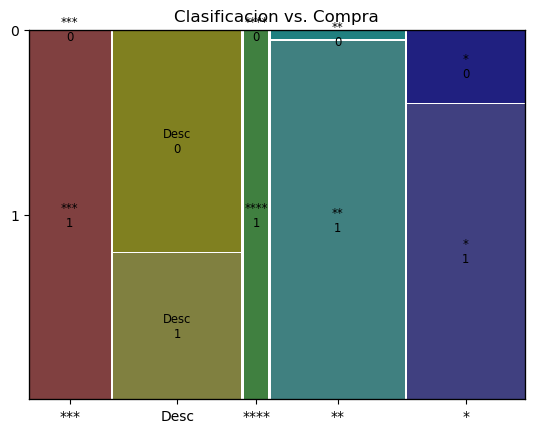

In [10]:
plt.clf()
#mosaic(pd.crosstab(vinosDep.Clasificacion, varObjBin))
mosaic(vinosDep,['Clasificacion','Compra'],gap=0.005, title='Clasificacion vs. Compra')
#sns.heatmap(pd.crosstab(vinosDep.Etiqueta, varObjBin))
plt.show()

<Figure size 640x480 with 0 Axes>

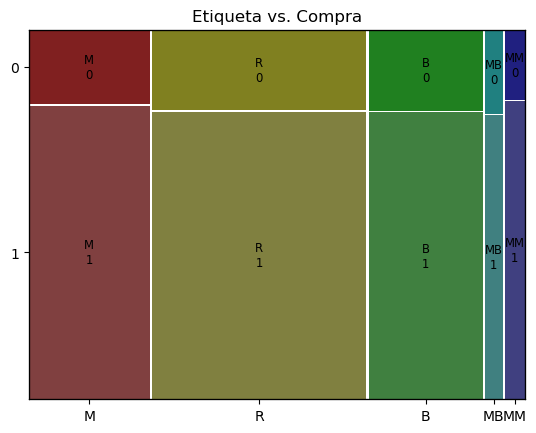

In [11]:
plt.clf()
#mosaic(pd.crosstab(vinosDep.Clasificacion, varObjBin))
mosaic(vinosDep,['Etiqueta','Compra'],gap=0.005, title='Etiqueta vs. Compra')
#sns.heatmap(pd.crosstab(vinosDep.Etiqueta, varObjBin))
plt.show()

<Figure size 640x480 with 0 Axes>

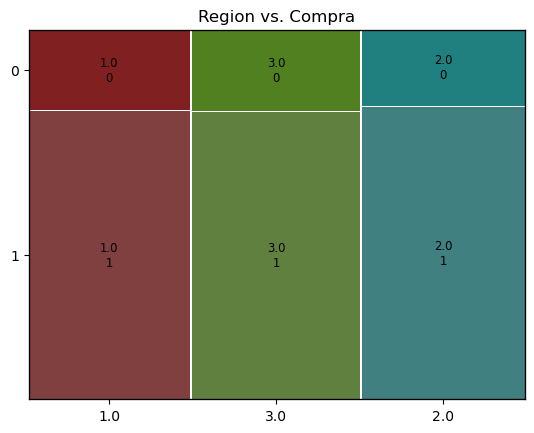

In [12]:
plt.clf()
#mosaic(pd.crosstab(vinosDep.Clasificacion, varObjBin))
mosaic(vinosDep,['Region','Compra'],gap=0.005, title='Region vs. Compra')
#sns.heatmap(pd.crosstab(vinosDep.Etiqueta, varObjBin))
plt.show()

In [ ]:
# Se ve que la variable Region no es importante para la compra, pero la variable Clasificacion sí lo es.

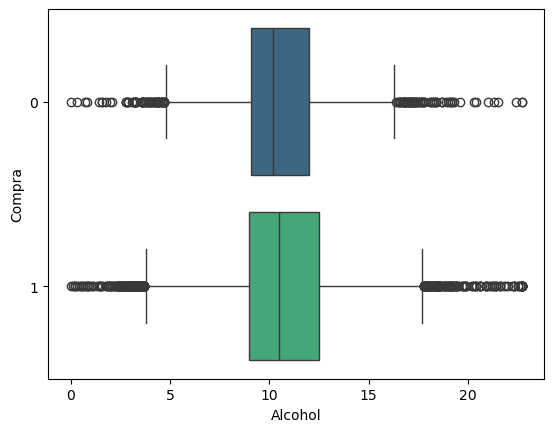

In [13]:
plt.clf()
sns.boxplot(x='Alcohol',y='Compra',hue='Compra',data=vinosDep,palette='viridis',legend=False)
plt.show()

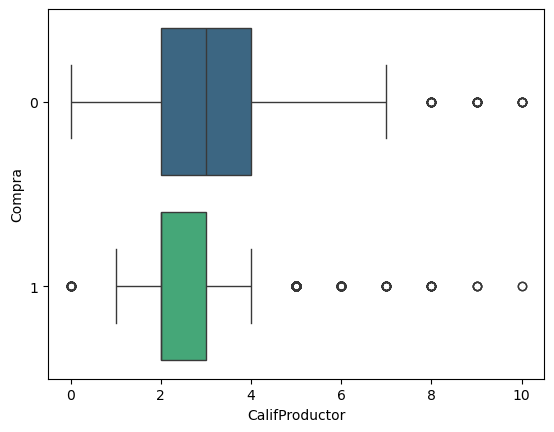

In [14]:
plt.clf()
sns.boxplot(x='CalifProductor',y='Compra',hue='Compra',data=vinosDep,palette='viridis',legend=False)
plt.show()

<Figure size 640x480 with 0 Axes>

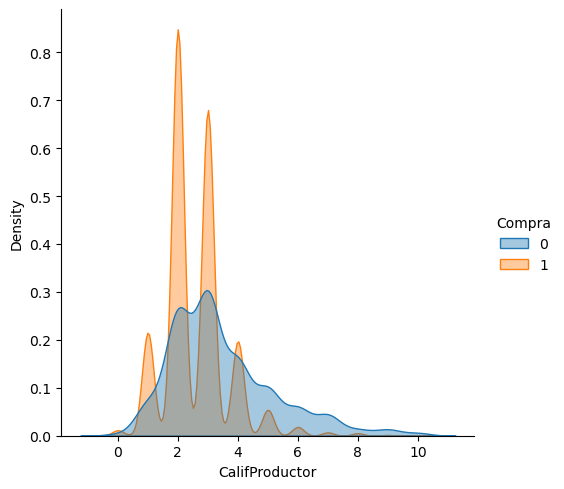

In [15]:
plt.clf()
#sns.kdeplot(vinosDep,x="CalifProductor", hue="Compra", fill=True, common_norm=False, alpha=0.4)
sns.displot(vinosDep, x="CalifProductor", hue="Compra",kind="kde",fill=True, common_norm=False, alpha=0.4)
#sns.histplot(y='CalifProductor',color='Compra',data=vinosDep,palette='viridis')
plt.show()

<Figure size 640x480 with 0 Axes>

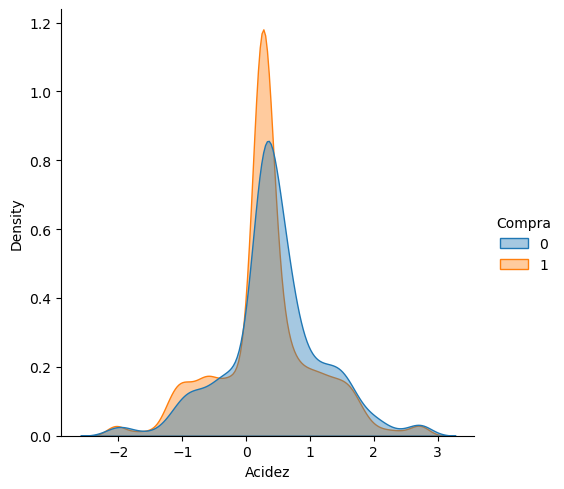

In [16]:
plt.clf()
#sns.kdeplot(vinosDep,x="Acidez", hue="Compra", fill=True, common_norm=False, alpha=0.4)
sns.displot(vinosDep, x="Acidez", hue="Compra", kind="kde",fill=True, common_norm=False, alpha=0.4)
#sns.histplot(y='CalifProductor',color='Compra',data=vinosDep,palette='viridis')
plt.show()

<Figure size 640x480 with 0 Axes>

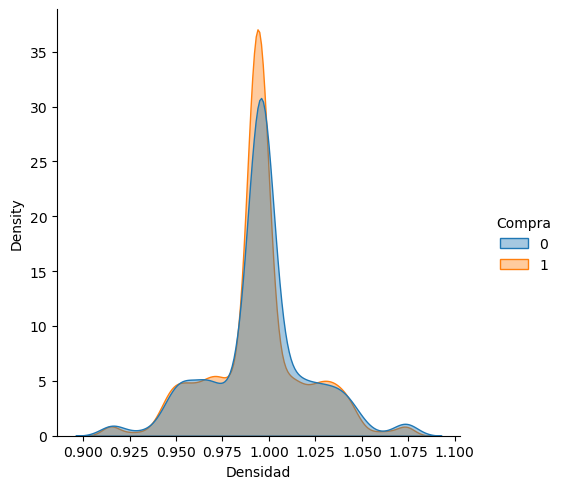

In [17]:
plt.clf()
#sns.kdeplot(vinosDep,x="Densidad", hue="Compra", fill=True, common_norm=False, alpha=0.4)
sns.displot(vinosDep, x="Densidad", hue="Compra",kind="kde",fill=True, common_norm=False, alpha=0.4)
#sns.histplot(y='CalifProductor',color='Compra',data=vinosDep,palette='viridis')
plt.show()

## Tranformaciones de variables

In [37]:
## Función mejor tranformación ##
from sklearn.preprocessing import scale

In [18]:
# Aplicar a las variables continuas la mejor transfromación según cramer frente a varObjBin
transf_cramer = imputDep.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x,varObjBin, tipo='cramer'))
transf_cramer_names = imputDep.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x,varObjBin,tipo='cramer', name=True))
transf_cramer.columns = transf_cramer_names.values
transf_cramer

,Acidez_ident,AcidoCitrico_raiz4,Azucar_ident,CloruroSodico_ident,Densidad_cuarta,pH_ident,Sulfatos_ident,Alcohol_raiz4,CalifProductor_ident,PrecioBotella_raiz4,aleatorio_log,aleatorio2_log
0,2.870958,1.147441,3.683917,1.573250,377.644920,3.342822,3.262488,1.460077,1.52642,0.100000,0.102616,0.634058
1,6.092554,1.133434,3.347943,3.032679,96.376608,2.951332,3.024830,1.583549,2.28958,1.126739,0.867117,1.220907
2,3.039832,1.220678,3.547149,3.105334,98.990307,3.508453,3.813421,1.309897,2.28958,1.164986,-0.322346,1.108418
3,1.078295,1.326782,2.949532,3.042156,440.476058,3.071791,2.873594,1.349404,1.52642,1.371832,-0.645216,0.454202
4,3.013851,1.409040,3.242394,2.893686,101.357903,5.676705,2.787173,1.438962,0.76326,0.993743,0.568469,0.060327
...,...,...,...,...,...,...,...,...,...,...,...,...
6360,3.169735,1.304629,2.976291,3.228533,134.863737,4.697980,2.635936,1.293703,3.05274,0.659962,0.863476,0.522418
6361,3.559444,1.293802,4.510471,3.054791,94.568613,3.598797,4.375156,1.162987,1.52642,1.212342,-0.159751,-1.926951
6362,3.091793,1.121000,1.644289,3.029520,26.289894,2.755587,3.564961,1.414356,3.05274,0.860624,-1.777896,0.606717
6363,2.883948,1.085651,4.007998,3.162195,76.879514,3.147077,3.392119,1.369315,0.76326,0.100000,0.673409,-1.546396


In [19]:
# Generar input con tranformaciones
imput_transf = imputDep.join(transf_cramer)

# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(imput_transf.apply(lambda x: cramers_v(x,varObjBin)),columns=['VCramer'])

# Obtener el gráfico de importancia de las variables frente a la objetivo continua según vcramer
import plotly.express as px
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a Compra').update_yaxes(categoryorder="total ascending").show()

In [20]:
# Guardar archivo con transformaciones para la variable objetivo binaria
# Agregar variables objetivo al input ya limpio
todo_bin = pd.concat([imput_transf,varObjBin], axis=1)

# Guardar archivo
todo_bin.to_csv('todo_bin_Vino.csv')

## Modelos de regresión logística para la predicción de la variable compra

In [21]:
# Se trabaja con el archivo con variable originales
vinosDep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6365 entries, 0 to 6364
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              6365 non-null   int64   
 1   Acidez          6365 non-null   float64 
 2   AcidoCitrico    6365 non-null   float64 
 3   Azucar          6365 non-null   float64 
 4   CloruroSodico   6365 non-null   float64 
 5   Densidad        6365 non-null   float64 
 6   pH              6365 non-null   float64 
 7   Sulfatos        6365 non-null   float64 
 8   Alcohol         6365 non-null   float64 
 9   CalifProductor  6365 non-null   int64   
 10  PrecioBotella   6365 non-null   float64 
 11  Etiqueta        6365 non-null   category
 12  Clasificacion   6365 non-null   category
 13  Region          6365 non-null   category
 14  prop_missings   6365 non-null   category
 15  Beneficio       6365 non-null   int64   
 16  Compra          6365 non-null   category
 17  aleatorio       636

In [22]:
# Tabla de frecuencias relativas de las categorías de Compra
vinosDep.Compra.value_counts(normalize=True)

Compra
1    0.785232
0    0.214768
Name: proportion, dtype: float64

### Partición training-test

In [23]:
# Función necesaria
from sklearn.model_selection import train_test_split

# Crear 4 objetos: predictores para tr y tst y variable objetivo para tr y tst. 
X_train, X_test, y_train, y_test = train_test_split(imputDep, varObjBin, test_size=0.2, random_state=1234)

# Comprobar dimensiones
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (5092, 16) (5092,)
Testing dataset shape: (1273, 16) (1273,)


In [24]:
# ¿ Mantendrá la proporción de clases de la variable objetivo esta partición?
# Training 
print(y_train.value_counts(normalize=True))

# Test
y_test.value_counts(normalize=True)

Compra
1    0.784171
0    0.215829
Name: proportion, dtype: float64


Compra
1    0.789474
0    0.210526
Name: proportion, dtype: float64

## Modelo completo de referencia

In [25]:
# Generar el training con la objetivo dentro (método logit de *statmodels.formula.api* no acepta categórica como objetivo, por lo que se transforma en entera int64)
data_train = X_train.join(y_train.astype('int64'))

In [26]:
# Aplicar a fórmula de modelo completo
formC=ols_formula(data_train,'Compra')
formC

'Compra ~ Acidez + AcidoCitrico + Azucar + CloruroSodico + Densidad + pH + Sulfatos + Alcohol + CalifProductor + PrecioBotella + Etiqueta + Clasificacion + Region + prop_missings + aleatorio + aleatorio2'

In [27]:
data_train

,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella,Etiqueta,Clasificacion,Region,prop_missings,aleatorio,aleatorio2,Compra
3574,0.24,0.56,4.3,0.044,0.97323,2.61,0.44,13.3,4,2.32,M,Desc,2.0,0.000000,0.883892,0.726499,0
2287,0.24,0.30,-23.3,0.035,1.04440,3.22,0.57,5.4,3,1.09,MB,***,3.0,0.000000,0.533957,0.289682,1
5692,0.82,0.31,109.9,-0.448,0.99013,2.63,1.98,18.4,2,2.20,MM,*,2.0,0.000000,0.231473,0.628761,1
3525,0.61,0.28,1.6,0.147,1.02338,2.15,1.06,14.0,3,3.07,R,***,2.0,0.000000,0.657205,0.850955,1
809,0.58,-0.37,1.3,0.338,0.99410,5.19,-1.05,20.6,3,3.75,M,*,1.0,0.000000,0.110023,0.479913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.18,0.31,11.8,0.607,0.97072,3.07,-1.20,2.9,4,1.51,M,**,2.0,6.666667,0.059942,0.617452,1
3276,0.58,0.07,6.9,0.084,0.99440,2.55,2.23,9.7,1,2.04,M,**,3.0,0.000000,0.566280,0.167737,1
1318,0.44,1.42,2.7,-0.107,0.99630,3.84,0.63,11.6,6,2.92,M,**,2.0,0.000000,0.970512,0.545806,1
723,0.24,0.20,15.8,0.447,0.97091,3.54,2.15,15.9,3,1.94,M,Desc,1.0,6.666667,0.684759,0.982550,0


In [28]:
# Importar la api para fórmulas (en concreto logit para regresión)
from statsmodels.formula.api import logit 

# Ajustar regresión de ejemplo
modeloCompleto = logit(formC,data=data_train).fit()
modeloCompleto.summary()

         Current function value: 0.299776
         Iterations: 35


c:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Compra   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5066
Method:                           MLE   Df Model:                           25
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.4253
Time:                        20:23:16   Log-Likelihood:                -1526.5
converged:                      False   LL-Null:                       -2655.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               4.4814      1.791      2.502      0.012       0.971       7.991
Etiqueta[T.M]                          -0.3466      0.219     -1.582      0.114      -0.776       0.083
Etiqueta[T.R]                          -1.0105      0.214     -4.730      0.000      -1.429      -0.592
Etiqueta[T.B]                          -1.4241      0.229     -6.209      0.000      -1.874      -0.975
Etiqueta[T.MB]                         -1.9213      0.345     -5.567      0.000      -2.598      -1.245
Clasificacion[T.*]                      1.8082      0.098     18.515      0.000       1.617       2.000
Clasificacion[T.**]                     4.1641      0.179     23.325      0.000       3.814       4.514
Clasificacion[T.***]                   18.1892    207.419      0.088      0.930    -388.344     424.722
Clasificacion[T.****]                  24.1980   7066.750      0.003      0.997   -1.38e+04    1.39e+04
Region[T.2.0]                          -0.1032      0.112     -0.918      0.358      -0.323       0.117
Region[T.3.0]                          -0.1125      0.110     -1.021      0.307      -0.329       0.103
prop_missings[T.6.666666666666667]     -0.1714      0.106     -1.613      0.107      -0.380       0.037
prop_missings[T.13.333333333333334]    -0.3613      0.253     -1.430      0.153      -0.857       0.134
prop_missings[T.20.0]                   0.1873      1.136      0.165      0.869      -2.038       2.413
Acidez                                 -0.1781      0.059     -3.004      0.003      -0.294      -0.062
AcidoCitrico                            0.0108      0.054      0.198      0.843      -0.096       0.117
Azucar                                  0.0026      0.001      1.910      0.056   -6.77e-05       0.005
CloruroSodico                          -0.3353      0.144     -2.320      0.020      -0.619      -0.052
Densidad                               -1.5423      1.747     -0.883      0.377      -4.966       1.881
pH                                     -0.2534      0.068     -3.726      0.000      -0.387      -0.120
Sulfatos                               -0.0240      0.049     -0.490      0.624      -0.120       0.072
Alcohol                                -0.0126      0.013     -0.971      0.331      -0.038       0.013
CalifProductor                         -0.4203      0.035    -12.036      0.000      -0.489      -0.352
PrecioBotella                           0.0335      0.030      1.101      0.271      -0.026       0.093
aleatorio                              -0.2210      0.158     -1.396      0.163      -0.531       0.089
aleatorio2                             -0.2632      0.158     -1.666      0.096      -0.573       0.047
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This might indicate that

In [ ]:
# Los errores estandar de Clasificacion[T.***] y Clasificacion[T.****] son demasiado grandes (esto pasa porque todo vino de *** y **** estrellas es 1, no hay 0 por lo que el modelo no puede aprender de esa categoría)

In [29]:
# Ver la distribución de la tabla cruzada de Clasificación y la objetivo en data_train
pd.crosstab(data_train.Compra, data_train.Clasificacion)

Clasificacion,Desc,*,**,***,****
Compra,,,,,
0,810,250,39,0,0
1,526,971,1375,862,259


In [30]:
# Unir la categorías problemáticas de Clasificacion
imputDep.Clasificacion.replace(['**','***','****'],'**+',inplace=True)


# Actualizar la partición
X_train, X_test, y_train, y_test = train_test_split(imputDep, varObjBin, test_size=0.2, random_state=1234)

# Genero el training con la objetivo dentro 
data_train = X_train.join(y_train.astype('int64'))
data_test = X_test.join(y_test.astype('int64'))

# Volver a ajustar el modelo inicial
modeloCompleto = logit(formC,data=data_train).fit()
modeloCompleto.summary()

Optimization terminated successfully.
         Current function value: 0.304904
         Iterations 8


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17828\3226815176.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Usuario\AppData\Local\Temp\ipykernel_17828\3226815176.py:2: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Compra   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5068
Method:                           MLE   Df Model:                           23
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.4154
Time:                        20:24:35   Log-Likelihood:                -1552.6
converged:                       True   LL-Null:                       -2655.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               4.4078      1.788      2.465      0.014       0.903       7.913
Etiqueta[T.M]                          -0.3558      0.219     -1.621      0.105      -0.786       0.074
Etiqueta[T.R]                          -1.0154      0.214     -4.748      0.000      -1.435      -0.596
Etiqueta[T.B]                          -1.3945      0.229     -6.081      0.000      -1.844      -0.945
Etiqueta[T.MB]                         -1.7816      0.332     -5.363      0.000      -2.433      -1.131
Clasificacion[T.*]                      1.8059      0.098     18.520      0.000       1.615       1.997
Clasificacion[T.**+]                    4.8296      0.179     27.004      0.000       4.479       5.180
Region[T.2.0]                          -0.1076      0.112     -0.960      0.337      -0.327       0.112
Region[T.3.0]                          -0.1153      0.110     -1.048      0.295      -0.331       0.100
prop_missings[T.6.666666666666667]     -0.1562      0.106     -1.477      0.140      -0.363       0.051
prop_missings[T.13.333333333333334]    -0.3595      0.252     -1.425      0.154      -0.854       0.135
prop_missings[T.20.0]                   0.1156      1.154      0.100      0.920      -2.147       2.378
Acidez                                 -0.1756      0.059     -2.967      0.003      -0.292      -0.060
AcidoCitrico                            0.0090      0.054      0.168      0.867      -0.097       0.115
Azucar                                  0.0025      0.001      1.854      0.064      -0.000       0.005
CloruroSodico                          -0.3349      0.144     -2.318      0.020      -0.618      -0.052
Densidad                               -1.4857      1.746     -0.851      0.395      -4.907       1.935
pH                                     -0.2534      0.068     -3.728      0.000      -0.387      -0.120
Sulfatos                               -0.0273      0.049     -0.560      0.575      -0.123       0.068
Alcohol                                -0.0108      0.013     -0.835      0.404      -0.036       0.015
CalifProductor                         -0.4222      0.035    -12.137      0.000      -0.490      -0.354
PrecioBotella                           0.0329      0.030      1.081      0.280      -0.027       0.093
aleatorio                              -0.2164      0.158     -1.372      0.170      -0.526       0.093
aleatorio2                             -0.2604      0.158     -1.652      0.099      -0.569       0.049
=======================================================================================================
"""

In [31]:
# Volver al modelo inicial con Etiqueta y Clasificación con data_train
modeloEti= logit('Compra~Etiqueta+Clasificacion',data=data_train).fit()
modeloEti.summary()

Optimization terminated successfully.
         Current function value: 0.325890
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Compra   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5085
Method:                           MLE   Df Model:                            6
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.3752
Time:                        20:25:47   Log-Likelihood:                -1659.4
converged:                       True   LL-Null:                       -2655.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3894      0.196      1.987      0.047       0.005       0.774
Etiqueta[T.M]           -0.3264      0.210     -1.551      0.121      -0.739       0.086
Etiqueta[T.R]           -1.0025      0.205     -4.886      0.000      -1.405      -0.600
Etiqueta[T.B]           -1.4218      0.219     -6.486      0.000      -1.851      -0.992
Etiqueta[T.MB]          -1.7830      0.324     -5.505      0.000      -2.418      -1.148
Clasificacion[T.*]       1.8148      0.093     19.529      0.000       1.633       1.997
Clasificacion[T.**+]     4.8798      0.176     27.741      0.000       4.535       5.225
========================================================================================
"""

## Importancia de las variables

In [32]:
import statsmodels.api as sm
import patsy

# Generar las matrices de diseño según la fórmula de modelo completo
y_tr, X_tr = patsy.dmatrices(formC, data_train, return_type='dataframe')

# Generar las matrices de diseño según la fórmula de modelo completo para test
y_tst, X_tst = patsy.dmatrices(formC, data_test, return_type='dataframe')

# Ahora se puede aplicar la función "oficial" de statmodels Logit (con formato y,X)
# model=sm.Logit(y_tr,X_tr).fit()
# model.summary()

In [33]:
# Calcular la importancia relativa de los efectos del modelo
from relativeImp import relativeImp

# Nombres de predictores (en modo dummy) donde quitamos la constante
names=X_tr.columns.tolist()[1:]

# Calcular importancia relativa
df_results = relativeImp(X_tr.join(y_tr), outcomeName = 'Compra', driverNames = names)

# Ordenar valores 
df_results.sort_values(by='normRelaImpt', ascending=False)

,driver,rawRelaImpt,normRelaImpt
5,Clasificacion[T.**+],0.275748,68.393335
4,Clasificacion[T.*],0.054204,13.444100
19,CalifProductor,0.053056,13.159347
2,Etiqueta[T.B],0.004131,1.024491
11,Acidez,0.003288,0.815514
1,Etiqueta[T.R],0.001961,0.486444
0,Etiqueta[T.M],0.001855,0.460024
16,pH,0.001744,0.432618
14,CloruroSodico,0.001647,0.408585
3,Etiqueta[T.MB],0.001451,0.359773


## Métricas de ajuste en training-test

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Definición de modelo
modelo = LogisticRegression(solver='lbfgs', max_iter=1000, penalty=None)

# Arreglar y para que le guste a sklearn...numeric
y_tr_ = y_tr.Compra.ravel()

# Ajuste de modelo
modelLog = modelo.fit(X_tr,y_tr_)

# Accuracy del modelo en training
acc = modelLog.score(X_tr,y_tr_)
print(acc)

# Predicciones en test
y_pred = modelLog.predict(X_tst)

# Matriz de confusion de clasificación 
print(metrics.confusion_matrix(y_tst,y_pred))

# Reporte de clasificación 
print(metrics.classification_report(y_tst,y_pred))

# Extraer el Area bajo la curva ROC
metrics.roc_auc_score(y_tr, modelLog.predict_proba(X_tr)[:, 1])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17828\2231923443.py:8: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



0.8605655930871956
[[183  85]
 [ 97 908]]
              precision    recall  f1-score   support

         0.0       0.65      0.68      0.67       268
         1.0       0.91      0.90      0.91      1005

    accuracy                           0.86      1273
   macro avg       0.78      0.79      0.79      1273
weighted avg       0.86      0.86      0.86      1273



0.905193278410102

In [35]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from bioinfokit.visuz import stat

fpr, tpr, thresholds = roc_curve(y_tr, modelLog.predict_proba(X_tr)[:, 1])
auc = roc_auc_score(y_tr, modelLog.predict_proba(X_tr)[:, 1])

# plot ROC
plt.clf()
stat.roc(fpr=fpr, tpr=tpr, auc=auc, shade_auc=True, per_class=True, legendpos='upper center', legendanchor=(0.5, 1.08), legendcols=3)
plt.show()

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calcular las tasas de verdaderos positivos y falsos positivos
fpr, tpr, thresholds = roc_curve(y_tr_, modelLog.predict_proba(X_tr)[:, 1])
roc_auc = auc(fpr, tpr)

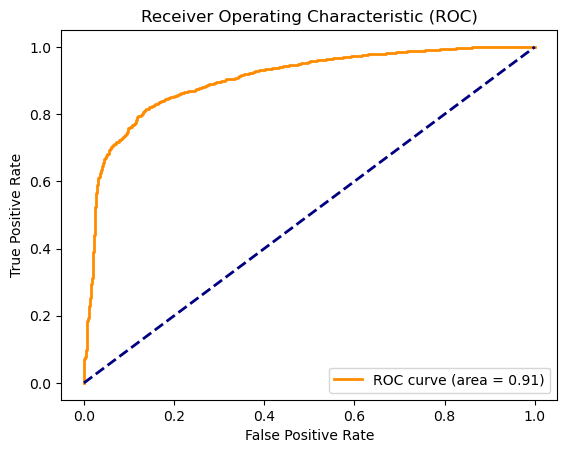

In [37]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Proceso manual hacia delante

In [38]:
# Se considera un modelo con las 3 primeras variables ya que presentan una importancia bastante más elevada que el resto
form1 = 'Compra ~ Clasificacion + CalifProductor + pH'

# Ajustar modelo 1
modelo1 = logit(form1,data=data_train).fit()
modelo1.summary()

Optimization terminated successfully.
         Current function value: 0.317393
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Compra   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5087
Method:                           MLE   Df Model:                            4
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.3915
Time:                        20:30:12   Log-Likelihood:                -1616.2
converged:                       True   LL-Null:                       -2655.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7054      0.248      6.872      0.000       1.219       2.192
Clasificacion[T.*]       1.7692      0.094     18.812      0.000       1.585       1.954
Clasificacion[T.**+]     4.5533      0.173     26.291      0.000       4.214       4.893
CalifProductor          -0.4389      0.034    -12.991      0.000      -0.505      -0.373
pH                      -0.2613      0.066     -3.951      0.000      -0.391      -0.132
========================================================================================
"""

In [39]:
# Probar entonces la interacción de clasificación y etiqueta
form2 = 'Compra ~ Clasificacion*Etiqueta + CalifProductor + pH'

# Ajustar modelo 2
modelo2 = logit(form2,data=data_train).fit()
modelo2.summary()

Optimization terminated successfully.
         Current function value: 0.303100
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Compra   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5075
Method:                           MLE   Df Model:                           16
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.4189
Time:                        20:30:15   Log-Likelihood:                -1543.4
converged:                       True   LL-Null:                       -2655.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               2.6114      0.351      7.445      0.000       1.924       3.299
Clasificacion[T.*]                      1.5060      0.419      3.598      0.000       0.686       2.326
Clasificacion[T.**+]                    2.7012      1.050      2.572      0.010       0.643       4.760
Etiqueta[T.M]                          -0.3578      0.266     -1.343      0.179      -0.880       0.164
Etiqueta[T.R]                          -1.0943      0.262     -4.173      0.000      -1.608      -0.580
Etiqueta[T.B]                          -1.9260      0.295     -6.519      0.000      -2.505      -1.347
Etiqueta[T.MB]                         -1.8426      0.459     -4.019      0.000      -2.741      -0.944
Clasificacion[T.*]:Etiqueta[T.M]        0.2004      0.458      0.437      0.662      -0.698       1.098
Clasificacion[T.**+]:Etiqueta[T.M]      0.4597      1.086      0.423      0.672      -1.669       2.589
Clasificacion[T.*]:Etiqueta[T.R]        0.1998      0.441      0.453      0.650      -0.664       1.064
Clasificacion[T.**+]:Etiqueta[T.R]      2.1593      1.086      1.988      0.047       0.030       4.289
Clasificacion[T.*]:Etiqueta[T.B]        0.9749      0.485      2.011      0.044       0.025       1.925
Clasificacion[T.**+]:Etiqueta[T.B]      3.5081      1.140      3.077      0.002       1.274       5.743
Clasificacion[T.*]:Etiqueta[T.MB]      -0.3236      0.729     -0.444      0.657      -1.752       1.105
Clasificacion[T.**+]:Etiqueta[T.MB]     3.4298      1.504      2.280      0.023       0.481       6.378
CalifProductor                         -0.4244      0.035    -12.240      0.000      -0.492      -0.356
pH                                     -0.2627      0.068     -3.883      0.000      -0.395      -0.130
=======================================================================================================
"""

In [40]:
# Eliminar la interacción y poner en su lugar un par de variables continuas para obtener un modelo más sencillo
form3 = 'Compra ~  Clasificacion + CalifProductor + pH + Etiqueta'

# Ajustar modelo 3
modelo3 = logit(form3,data=data_train).fit()
modelo3.summary()

Optimization terminated successfully.
         Current function value: 0.307987
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Compra   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5083
Method:                           MLE   Df Model:                            8
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.4095
Time:                        20:30:21   Log-Likelihood:                -1568.3
converged:                       True   LL-Null:                       -2655.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4790      0.320      7.750      0.000       1.852       3.106
Clasificacion[T.*]       1.7978      0.096     18.640      0.000       1.609       1.987
Clasificacion[T.**+]     4.8205      0.178     27.081      0.000       4.472       5.169
Etiqueta[T.M]           -0.3483      0.218     -1.600      0.110      -0.775       0.078
Etiqueta[T.R]           -1.0004      0.212     -4.719      0.000      -1.416      -0.585
Etiqueta[T.B]           -1.3695      0.227     -6.027      0.000      -1.815      -0.924
Etiqueta[T.MB]          -1.7407      0.330     -5.280      0.000      -2.387      -1.095
CalifProductor          -0.4283      0.034    -12.439      0.000      -0.496      -0.361
pH                      -0.2583      0.067     -3.840      0.000      -0.390      -0.126
========================================================================================
"""

In [41]:
# Introducir otro par de variables continuas de las que pueden influir para valorar el aporte a la capacidad predictiva
form4 = 'Compra ~  Clasificacion + CalifProductor + pH + Etiqueta + CloruroSodico'

# Ajustar modelo 4
modelo4 = logit(form4,data=data_train).fit()
modelo4.summary()

Optimization terminated successfully.
         Current function value: 0.307458
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Compra   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5082
Method:                           MLE   Df Model:                            9
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.4105
Time:                        20:30:24   Log-Likelihood:                -1565.6
converged:                       True   LL-Null:                       -2655.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4941      0.320      7.797      0.000       1.867       3.121
Clasificacion[T.*]       1.7963      0.097     18.611      0.000       1.607       1.985
Clasificacion[T.**+]     4.8203      0.178     27.064      0.000       4.471       5.169
Etiqueta[T.M]           -0.3445      0.218     -1.581      0.114      -0.771       0.082
Etiqueta[T.R]           -0.9934      0.212     -4.682      0.000      -1.409      -0.578
Etiqueta[T.B]           -1.3644      0.227     -6.000      0.000      -1.810      -0.919
Etiqueta[T.MB]          -1.7293      0.331     -5.231      0.000      -2.377      -1.081
CalifProductor          -0.4254      0.034    -12.351      0.000      -0.493      -0.358
pH                      -0.2613      0.067     -3.884      0.000      -0.393      -0.129
CloruroSodico           -0.3321      0.143     -2.317      0.020      -0.613      -0.051
========================================================================================
"""

In [42]:
form5 = 'Compra ~  Clasificacion + CalifProductor + pH + Etiqueta + Acidez'

# Ajustar modelo 5
modelo5 = logit(form5,data=data_train).fit()
modelo5.summary()

Optimization terminated successfully.
         Current function value: 0.307112
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Compra   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5082
Method:                           MLE   Df Model:                            9
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.4112
Time:                        20:30:28   Log-Likelihood:                -1563.8
converged:                       True   LL-Null:                       -2655.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.5096      0.321      7.820      0.000       1.881       3.139
Clasificacion[T.*]       1.7982      0.097     18.606      0.000       1.609       1.988
Clasificacion[T.**+]     4.8116      0.178     27.042      0.000       4.463       5.160
Etiqueta[T.M]           -0.3510      0.218     -1.610      0.107      -0.778       0.076
Etiqueta[T.R]           -0.9975      0.212     -4.698      0.000      -1.414      -0.581
Etiqueta[T.B]           -1.3797      0.228     -6.063      0.000      -1.826      -0.934
Etiqueta[T.MB]          -1.7487      0.330     -5.300      0.000      -2.395      -1.102
CalifProductor          -0.4234      0.035    -12.266      0.000      -0.491      -0.356
pH                      -0.2509      0.068     -3.716      0.000      -0.383      -0.119
Acidez                  -0.1756      0.059     -2.977      0.003      -0.291      -0.060
========================================================================================
"""

In [43]:
form6 = 'Compra ~  Clasificacion*Etiqueta + CalifProductor + pH + CloruroSodico + Acidez'

# Ajustar modelo 6
modelo6 = logit(form6,data=data_train).fit()
modelo6.summary()

Optimization terminated successfully.
         Current function value: 0.301668
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Compra   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5073
Method:                           MLE   Df Model:                           18
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.4216
Time:                        20:30:31   Log-Likelihood:                -1536.1
converged:                       True   LL-Null:                       -2655.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               2.6440      0.352      7.508      0.000       1.954       3.334
Clasificacion[T.*]                      1.5383      0.420      3.661      0.000       0.715       2.362
Clasificacion[T.**+]                    2.7580      1.051      2.624      0.009       0.698       4.818
Etiqueta[T.M]                          -0.3535      0.268     -1.319      0.187      -0.879       0.172
Etiqueta[T.R]                          -1.0656      0.264     -4.039      0.000      -1.583      -0.549
Etiqueta[T.B]                          -1.9285      0.297     -6.494      0.000      -2.510      -1.346
Etiqueta[T.MB]                         -1.8048      0.460     -3.926      0.000      -2.706      -0.904
Clasificacion[T.*]:Etiqueta[T.M]        0.1894      0.460      0.412      0.680      -0.712       1.091
Clasificacion[T.**+]:Etiqueta[T.M]      0.4284      1.087      0.394      0.693      -1.702       2.559
Clasificacion[T.*]:Etiqueta[T.R]        0.1489      0.443      0.337      0.736      -0.718       1.016
Clasificacion[T.**+]:Etiqueta[T.R]      2.0729      1.087      1.907      0.057      -0.058       4.203
Clasificacion[T.*]:Etiqueta[T.B]        0.9536      0.486      1.961      0.050       0.001       1.907
Clasificacion[T.**+]:Etiqueta[T.B]      3.4543      1.141      3.028      0.002       1.219       5.690
Clasificacion[T.*]:Etiqueta[T.MB]      -0.4221      0.731     -0.577      0.564      -1.855       1.011
Clasificacion[T.**+]:Etiqueta[T.MB]     3.3473      1.505      2.224      0.026       0.398       6.297
CalifProductor                         -0.4159      0.035    -11.956      0.000      -0.484      -0.348
pH                                     -0.2573      0.068     -3.789      0.000      -0.390      -0.124
CloruroSodico                          -0.3533      0.145     -2.431      0.015      -0.638      -0.068
Acidez                                 -0.1793      0.060     -3.013      0.003      -0.296      -0.063
=======================================================================================================
"""

In [44]:
# Uno con todas las variables
form7 = 'Compra ~ Acidez + AcidoCitrico + Azucar + CloruroSodico + Densidad + pH + Sulfatos + Alcohol + CalifProductor + PrecioBotella + Etiqueta + Clasificacion + Region'

# Ajustar modelo 7
modelo7 = logit(form7,data=data_train).fit()
modelo7.summary()


Optimization terminated successfully.
         Current function value: 0.305759
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Compra   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5073
Method:                           MLE   Df Model:                           18
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.4138
Time:                        20:30:36   Log-Likelihood:                -1556.9
converged:                       True   LL-Null:                       -2655.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.9795      1.778      2.238      0.025       0.495       7.464
Etiqueta[T.M]           -0.3437      0.219     -1.573      0.116      -0.772       0.085
Etiqueta[T.R]           -0.9988      0.213     -4.690      0.000      -1.416      -0.581
Etiqueta[T.B]           -1.3745      0.228     -6.022      0.000      -1.822      -0.927
Etiqueta[T.MB]          -1.7462      0.331     -5.270      0.000      -2.396      -1.097
Clasificacion[T.*]       1.8043      0.097     18.569      0.000       1.614       1.995
Clasificacion[T.**+]     4.8216      0.178     27.014      0.000       4.472       5.171
Region[T.2.0]           -0.0982      0.112     -0.878      0.380      -0.317       0.121
Region[T.3.0]           -0.1075      0.110     -0.980      0.327      -0.322       0.107
Acidez                  -0.1779      0.059     -3.004      0.003      -0.294      -0.062
AcidoCitrico             0.0091      0.054      0.170      0.865      -0.096       0.115
Azucar                   0.0025      0.001      1.838      0.066      -0.000       0.005
CloruroSodico           -0.3393      0.144     -2.351      0.019      -0.622      -0.056
Densidad                -1.3483      1.742     -0.774      0.439      -4.763       2.066
pH                      -0.2565      0.068     -3.783      0.000      -0.389      -0.124
Sulfatos                -0.0293      0.049     -0.604      0.546      -0.125       0.066
Alcohol                 -0.0122      0.013     -0.948      0.343      -0.037       0.013
CalifProductor          -0.4193      0.035    -12.070      0.000      -0.487      -0.351
PrecioBotella            0.0344      0.030      1.135      0.257      -0.025       0.094
========================================================================================
"""

# Evaluación de los modelos por validación cruzada repetida

In [51]:
# Arreglar variable objetivo como numeric
vinosDep.Compra = vinosDep.Compra.astype('int64')

# Aplicación a una fórmula
cross_val_log(form7,data=vinosDep)

<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Compra ~ Acidez + AcidoCitrico + Azucar + CloruroSodico + Densidad + pH + Sulfatos + Alcohol + CalifProductor + PrecioBotella + Etiqueta + Clasificacion + Region
AUC: 0.908 (0.007)


array([0.89722155, 0.91687619, 0.91141026, 0.91475458, 0.90316269,
       0.91879873, 0.9097993 , 0.91175973, 0.89677289, 0.9046044 ,
       0.90621862, 0.91030243, 0.90907771, 0.90229632, 0.9142815 ,
       0.91348789, 0.896967  , 0.90512333, 0.91434668, 0.9104427 ,
       0.90575546, 0.90187933, 0.90678755, 0.91409144, 0.91335487,
       0.8994479 , 0.91068968, 0.90754201, 0.9125074 , 0.9113329 ,
       0.90999496, 0.9076782 , 0.89765856, 0.90941535, 0.91742983,
       0.91115948, 0.9099794 , 0.9113805 , 0.90216664, 0.90851507,
       0.91123109, 0.91331112, 0.91865753, 0.91370183, 0.88656253,
       0.91246583, 0.91453863, 0.90552474, 0.90675795, 0.90270359,
       0.91735534, 0.91300243, 0.90277685, 0.89975919, 0.90920769,
       0.89902472, 0.9052525 , 0.90050913, 0.91969199, 0.91735534,
       0.90557758, 0.91083621, 0.90634127, 0.9070015 , 0.91377783,
       0.91139734, 0.89811918, 0.90533585, 0.90588045, 0.9187147 ,
       0.90295041, 0.91225167, 0.91228552, 0.90992986, 0.90309

In [52]:
# Crear lista de fórmulas   
list_form = [formC,form1,form2,form3,form4,form5,form6,form7]
#list_form


# Aplicamos a toda la lista la función creada (devuelve un dataframe pero está transpuesto)
list_res = pd.DataFrame(map(lambda x: cross_val_log(x,vinosDep, seed=2022),list_form))
# np.random.seed(1234)

<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Compra ~ Acidez + AcidoCitrico + Azucar + CloruroSodico + Densidad + pH + Sulfatos + Alcohol + CalifProductor + PrecioBotella + Etiqueta + Clasificacion + Region + prop_missings + aleatorio + aleatorio2
AUC: 0.908 (0.007)


<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Compra ~ Clasificacion + CalifProductor + pH
AUC: 0.901 (0.007)


<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Compra ~ Clasificacion*Etiqueta + CalifProductor + pH
AUC: 0.910 (0.007)


<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Compra ~  Clasificacion + CalifProductor + pH + Etiqueta
AUC: 0.908 (0.007)


<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Compra ~  Clasificacion + CalifProductor + pH + Etiqueta + CloruroSodico
AUC: 0.908 (0.007)


<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Compra ~  Clasificacion + CalifProductor + pH + Etiqueta + Acidez
AUC: 0.909 (0.007)


<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Compra ~  Clasificacion*Etiqueta + CalifProductor + pH + CloruroSodico + Acidez
AUC: 0.910 (0.007)


<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Compra ~ Acidez + AcidoCitrico + Azucar + CloruroSodico + Densidad + pH + Sulfatos + Alcohol + CalifProductor + PrecioBotella + Etiqueta + Clasificacion + Region
AUC: 0.908 (0.007)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17828\1551070279.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




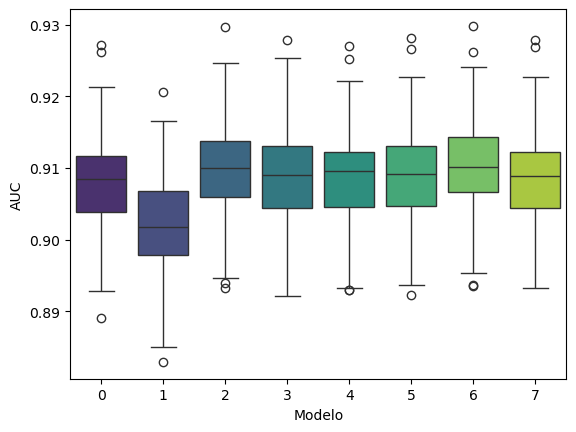

In [53]:
# Transponer dataframe y pasar de wide a long (creando un factor variable con el nombre de cada fórmula de la lista[0,1,2,3])
results = list_res.T.melt()
results.columns = ['Modelo','AUC']
results.head()

# Boxplot paralelo para comparar
plt.clf()
sns.boxplot(x='Modelo',y='AUC',data=results,palette='viridis')
plt.show()

## Punto de corte óptimo para la probabilidad estimada

In [54]:
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

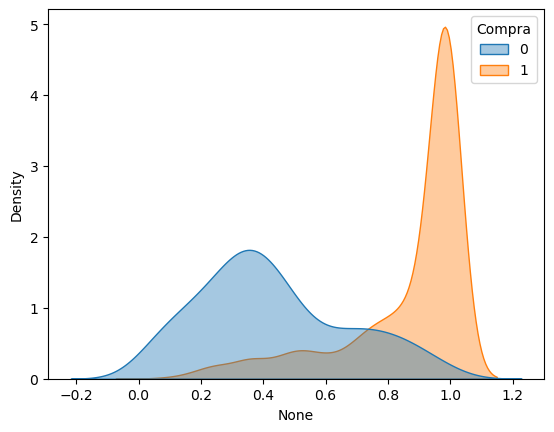

In [55]:
## Buscar el mejor punto de corte

y_pred = modelo3.predict(X_test)

#sns.histplot(x=y_pred, hue=y_test)
#px.histogram(x=y_pred, color=y_test).show()
#gráfico de las probabilidades obtenidas
plt.clf()
sns.kdeplot(x=y_pred, hue=y_test, fill=True, common_norm=False, alpha=0.4)
plt.show()
#hist_targetbinaria(predict(modelo4, newdata=data_test,type="response"),data_test$varObjBin,"probabilidad")

In [56]:
y_pred.describe()

count    1273.000000
mean        0.772792
std         0.274414
min         0.015718
25%         0.575268
50%         0.925298
75%         0.986731
max         0.998255
dtype: float64

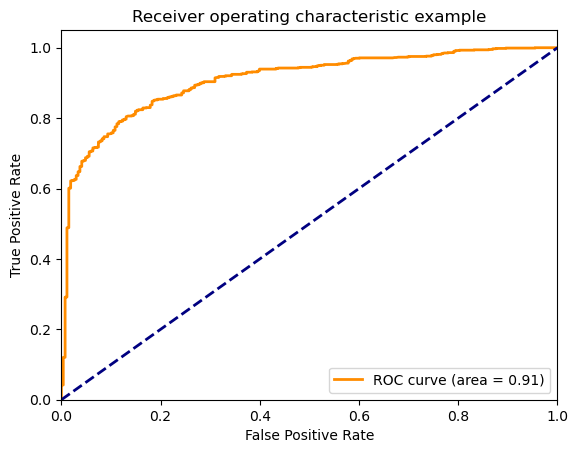

In [57]:
def roc_grafico(test,pred): 
    fpr, tpr, thresholds = metrics.roc_curve(test,pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()
    
roc_grafico(y_test,y_pred)


In [58]:
# Aplicar corte de youden (NuestrasFunciones), este es el primer punto a probar
corte = cutoff_youden(y_test,y_pred)
corte

0.7631451170350869

In [59]:
# Ver los coeficientes del modelo ganador
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Compra   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5083
Method:                           MLE   Df Model:                            8
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.4095
Time:                        22:33:17   Log-Likelihood:                -1568.3
converged:                       True   LL-Null:                       -2655.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4790      0.320      7.750      0.000       1.852       3.106
Clasificacion[T.*]       1.7978      0.096     18.640      0.000       1.609       1.987
Clasificacion[T.**+]     4.8205      0.178     27.081      0.000       4.472       5.169
Etiqueta[T.M]           -0.3483      0.218     -1.600      0.110      -0.775       0.078
Etiqueta[T.R]           -1.0004      0.212     -4.719      0.000      -1.416      -0.585
Etiqueta[T.B]           -1.3695      0.227     -6.027      0.000      -1.815      -0.924
Etiqueta[T.MB]          -1.7407      0.330     -5.280      0.000      -2.387      -1.095
CalifProductor          -0.4283      0.034    -12.439      0.000      -0.496      -0.361
pH                      -0.2583      0.067     -3.840      0.000      -0.390      -0.126
========================================================================================
"""

## Matrices de confusión

**Matriz de confusión (punto de corte por defecto 0.5)**

In [60]:
y_pred = modelo3.predict(X_test)
round(y_pred)

2944    1.0
2258    1.0
3221    0.0
1070    1.0
1806    1.0
       ... 
1624    1.0
2815    1.0
3512    1.0
4615    1.0
4809    1.0
Length: 1273, dtype: float64

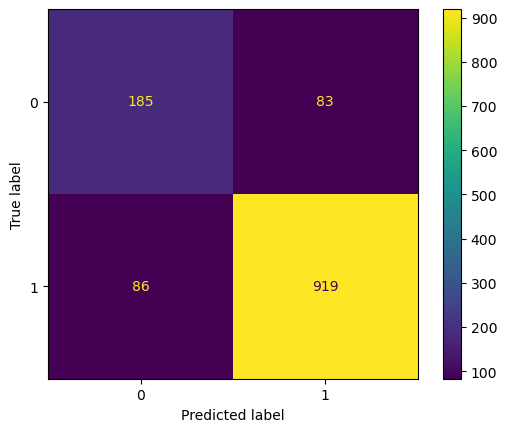

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = modelo3.predict(X_test)
cm = confusion_matrix(y_test, round(y_pred))

cm_display = ConfusionMatrixDisplay(cm).plot()
cm_display
plt.show()

In [62]:
# Reporte de clasificación 
print(metrics.classification_report(y_tst,round(y_pred)))

              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69       268
         1.0       0.92      0.91      0.92      1005

    accuracy                           0.87      1273
   macro avg       0.80      0.80      0.80      1273
weighted avg       0.87      0.87      0.87      1273



**Matriz de confusión (punto de corte óptimo por Youden)**

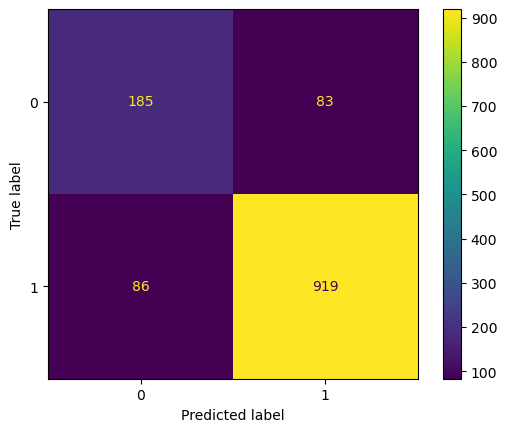

In [63]:
ConfusionMatrixDisplay(cm).plot()

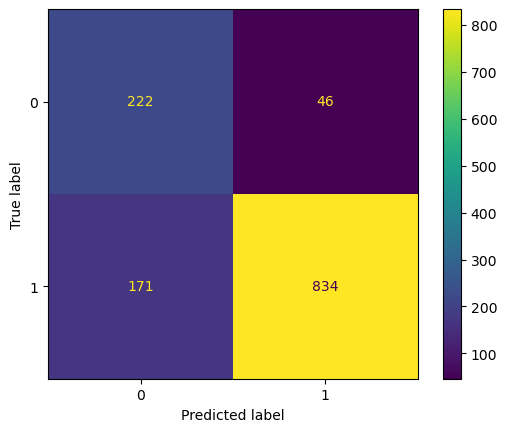

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = modelo3.predict(X_test)
y_clas =  y_pred.map(lambda x: 1 if x > 0.7 else 0)

cm = confusion_matrix(y_test, y_clas)

cm_display = ConfusionMatrixDisplay(cm).plot()
cm_display
plt.show(cm_display)


In [65]:
# Reporte de clasificación 
print(metrics.classification_report(y_tst,y_clas))

              precision    recall  f1-score   support

         0.0       0.56      0.83      0.67       268
         1.0       0.95      0.83      0.88      1005

    accuracy                           0.83      1273
   macro avg       0.76      0.83      0.78      1273
weighted avg       0.87      0.83      0.84      1273



# Interpretación de parámetros del modelo logístico

In [66]:
varObjBin

0       1
1       1
2       0
3       1
4       1
       ..
6360    0
6361    1
6362    1
6363    1
6364    1
Name: Compra, Length: 6365, dtype: category
Categories (2, int64): [0, 1]

In [67]:
# Ajustar el modelo a datos completos para obtener estimadores más fiables
vinosDep = pd.concat([imputDep,varObjBin.astype('int64')], axis=1)

modeloF = logit(form3,data=vinosDep).fit()
modeloF.summary()

Optimization terminated successfully.
         Current function value: 0.306391
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Compra   No. Observations:                 6365
Model:                          Logit   Df Residuals:                     6356
Method:                           MLE   Df Model:                            8
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.4110
Time:                        22:39:36   Log-Likelihood:                -1950.2
converged:                       True   LL-Null:                       -3311.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4246      0.286      8.474      0.000       1.864       2.985
Clasificacion[T.*]       1.8162      0.086     21.012      0.000       1.647       1.986
Clasificacion[T.**+]     4.8493      0.163     29.743      0.000       4.530       5.169
Etiqueta[T.M]           -0.3704      0.194     -1.908      0.056      -0.751       0.010
Etiqueta[T.R]           -0.9703      0.189     -5.130      0.000      -1.341      -0.600
Etiqueta[T.B]           -1.3849      0.203     -6.830      0.000      -1.782      -0.987
Etiqueta[T.MB]          -1.6942      0.301     -5.622      0.000      -2.285      -1.104
CalifProductor          -0.4307      0.030    -14.185      0.000      -0.490      -0.371
pH                      -0.2332      0.061     -3.824      0.000      -0.353      -0.114
========================================================================================
"""

In [68]:
# No se pueden interpretar los Betas directamente, por lo que s debe hacer lo siguiente:
np.exp(modeloF.params)

Intercept                11.297780
Clasificacion[T.*]        6.148739
Clasificacion[T.**+]    127.646134
Etiqueta[T.M]             0.690485
Etiqueta[T.R]             0.378976
Etiqueta[T.B]             0.250356
Etiqueta[T.MB]            0.183754
CalifProductor            0.650025
pH                        0.791996
dtype: float64

Conclusiones del modelo:

* La probabilidad de compra respecto a no compra de un vino con Clasificación 2 o más estrellas es 127 veces superior a aquellos vinos con clasificación desconocida.

* La probabilidad compra respecto a no compra de un vino con **Clasificación * ** es 6,13 veces la correspondiente a aquellos vinos con clasificación desconocida.

* Un aumento unitario en la Calificación del productor produce una disminución del ratio de probabilidades de compra/no compra del 35%.

* La probabilidad de compra de un vino con Etiqueta MB se reduce en un 82% con respecto a la de un vino con Etiqueta MM.

* Cada aumento unitario del pH produce una reducción de la probabilidad de compra del 19%

Todos estos efectos se entiende en el contexto ceteris paribus, es decir, todo lo demás constante. Con lo cual, este aumento unitario del pH produce tal disminución en la probabilidad de compra para vinos con misma Etiqueta, Clasificación y Calificación del productor.